In [11]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

In [3]:
# load files
training_data = pd.read_csv("train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv("test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv("attributes.csv")
descriptions = pd.read_csv("product_descriptions.csv")

# merge descriptions
training_data = pd.merge(training_data, descriptions, on="product_uid", how="left")

# merge product counts
product_counts = pd.DataFrame(pd.Series(training_data.groupby(["product_uid"]).size(), name="product_count"))
training_data = pd.merge(training_data, product_counts, left_on="product_uid", right_index=True, how="left")

# merge brand names
brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
training_data = pd.merge(training_data, brand_names, on="product_uid", how="left")
training_data.brand_name.fillna("Unknown", inplace=True)

In [4]:
print(str(training_data.info()))
print(str(training_data.describe()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 8 columns):
id                     74067 non-null int64
product_uid            74067 non-null int64
product_title          74067 non-null object
search_term            74067 non-null object
relevance              74067 non-null float64
product_description    74067 non-null object
product_count          74067 non-null int64
brand_name             74067 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 5.1+ MB
None
                  id    product_uid     relevance  product_count
count   74067.000000   74067.000000  74067.000000   74067.000000
mean   112385.709223  142331.911553      2.381634       1.935450
std     64016.573650   30770.774864      0.533984       1.706594
min         2.000000  100001.000000      1.000000       1.000000
25%     57163.500000  115128.500000      2.000000       1.000000
50%    113228.000000  137334.000000      2.330000       1.000000
75%    16827

In [5]:
training_data[:10]

,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,1,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,2,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,2,Delta
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,3,Whirlpool
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,1,Lithonia Lighting
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,1,House of Fara


In [6]:
training_data["id_bins"] = pd.cut(training_data.id, 20, labels=False)
print(training_data.corr(method="spearman"))
training_data.describe()

                     id  product_uid  relevance  product_count   id_bins
id             1.000000     1.000000  -0.126681      -0.484873  0.998746
product_uid    1.000000     1.000000  -0.126681      -0.484873  0.998746
relevance     -0.126681    -0.126681   1.000000      -0.026358 -0.126639
product_count -0.484873    -0.484873  -0.026358       1.000000 -0.484009
id_bins        0.998746     0.998746  -0.126639      -0.484009  1.000000


,id,product_uid,relevance,product_count,id_bins
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634,1.935450,9.648764
std,64016.573650,30770.774864,0.533984,1.706594,5.773127
min,2.000000,100001.000000,1.000000,1.000000,0.000000
25%,57163.500000,115128.500000,2.000000,1.000000,5.000000
50%,113228.000000,137334.000000,2.330000,1.000000,10.000000
75%,168275.500000,166883.500000,3.000000,2.000000,15.000000
max,221473.000000,206650.000000,3.000000,21.000000,19.000000


3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

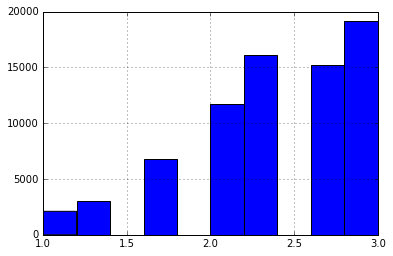

In [13]:
training_data.relevance.hist()
training_data.relevance.value_counts()

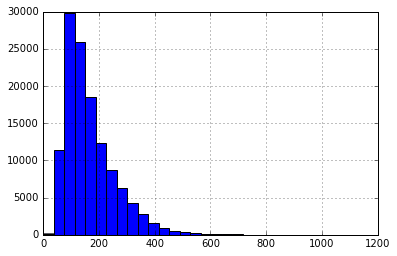

In [12]:
(descriptions.product_description.str.len() / 5).hist(bins=30)

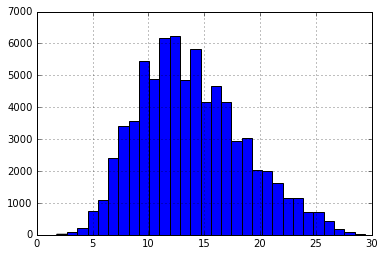

In [14]:
(training_data.product_title.str.len() / 5).hist(bins=30)

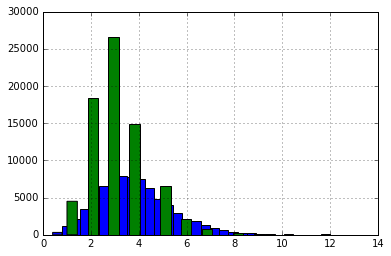

In [15]:
(training_data.search_term.str.len() / 5.).hist(bins=30)
(training_data.search_term.str.count("\\s+") + 1).hist(bins=30)

In [16]:
print("Indoor/outdoor", training_data.search_term.str.contains("indoor|outdoor|interior|exterior", case=False).value_counts())
print("Contains numbers", training_data.search_term.str.contains("\\d", case=False).value_counts())

Indoor/outdoor False    72003
True      2064
Name: search_term, dtype: int64
Contains numbers False    55811
True     18256
Name: search_term, dtype: int64
